To tackle this task, we need a structured plan. Let's break it down:

Task Breakdown
Objective: Compare sensitivity to noise for 3D LiDAR scans and Gaussian Splatting models.
Inputs:
5 LiDAR .ply files.
5 Gaussian splatting .ply files.
Outputs:
Numerical sensitivity to noise metrics.
Graphical comparison.
Tools Required:
Libraries to process 3D models (potentially open3d or trimesh).
Libraries for mathematical calculations and graphing (e.g., numpy, matplotlib, pandas).
Methods:
Load each 3D model.
Apply noise (Gaussian noise could be simulated).
Evaluate changes and calculate a sensitivity score.
Step-by-Step Plan
A. Load and Process Models
We will need to:

Read the 3D models.
Simulate Gaussian noise.
Calculate the sensitivity (e.g., change in surface normals, point distance).
B. Compare Sensitivity and Plot Results
Create a table to show sensitivity scores for each category.
Use a bar graph to visualize and compare the results.

In [3]:
pip install trimesh numpy matplotlib pandas

    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def apply_noise_to_model(mesh, noise_level=0.01):
    noise = np.random.normal(scale=noise_level, size=mesh.vertices.shape)
    noisy_vertices = mesh.vertices + noise
    mesh.vertices = noisy_vertices
    return mesh

In [6]:
def calculate_sensitivity(original_mesh, noisy_mesh):
    distance = np.linalg.norm(original_mesh.vertices - noisy_mesh.vertices, axis=1)
    return np.mean(distance)

In [7]:
# File paths for models
model_files = {
    'Nature': (
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/3DGS.ply',
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/LiDARPLY/AdvancedExport/3DModel.ply'
    ),
    'Accident': (
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Accident/3DGS.ply',
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Accident/LiDARPLY/AdvancedExport/3DModel.ply'
    ),
    'Homicide': (
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Homicide/3DGS.ply',
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Homicide/LiDARPLY/AdvancedExport/3DModel.ply'
    ),
    'Suicide': (
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Suicide/3DGS.ply',
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Suicide/LiDARPLY/AdvancedExport/3DModel.ply'
    ),
    'Undetermined': (
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/3DGS.ply',
        '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/LiDARPLY/AdvancedExport/3DModel.ply'
    ),
}

sensitivity_results = {}

for model_name, (gaussian_path, lidar_path) in model_files.items():
    # Load models
    gaussian_model = trimesh.load(gaussian_path)
    lidar_model = trimesh.load(lidar_path)
    
    # Apply noise
    noisy_gaussian = apply_noise_to_model(gaussian_model.copy())
    noisy_lidar = apply_noise_to_model(lidar_model.copy())
    
    # Calculate sensitivity
    gaussian_sensitivity = calculate_sensitivity(gaussian_model, noisy_gaussian)
    lidar_sensitivity = calculate_sensitivity(lidar_model, noisy_lidar)
    
    # Store results
    sensitivity_results[model_name] = {
        'Gaussian Splatting': gaussian_sensitivity,
        'LiDAR': lidar_sensitivity
    }

    # Print results for each model
    print(f'{model_name}:')
    print(f"Gaussian Splatting Sensitivity: {gaussian_sensitivity}")
    print(f"LiDAR Sensitivity: {lidar_sensitivity}\n")

Nature:
Gaussian Splatting Sensitivity: 0.01594637493598804
LiDAR Sensitivity: 0.01596247339734716

Accident:
Gaussian Splatting Sensitivity: 0.015963001909961996
LiDAR Sensitivity: 0.015955609126464227

Homicide:
Gaussian Splatting Sensitivity: 0.015948283357999214
LiDAR Sensitivity: 0.01596183113245701

Suicide:
Gaussian Splatting Sensitivity: 0.015959773873480614
LiDAR Sensitivity: 0.015952355103301993

Undetermined:
Gaussian Splatting Sensitivity: 0.015974193361524065
LiDAR Sensitivity: 0.015965913401476035



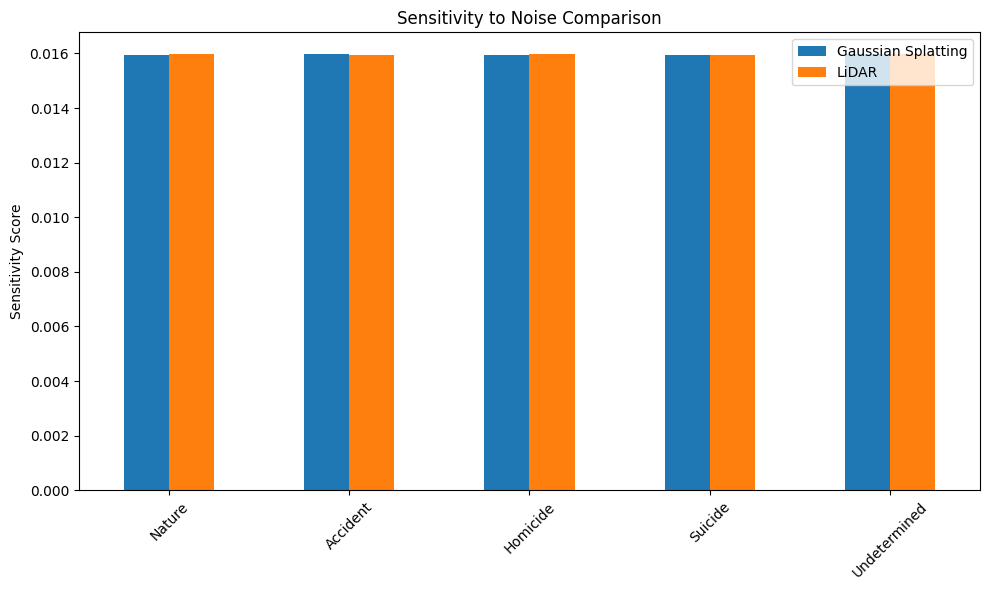

In [8]:
df = pd.DataFrame(sensitivity_results).T

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6))
plt.title('Sensitivity to Noise Comparison')
plt.ylabel('Sensitivity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
sensitivity_results = {
    'Natural': {'Gaussian Splatting': 0.01594637493598804, 'LiDAR': 0.01596247339734716},
    'Accidental': {'Gaussian Splatting': 0.015963001909961996, 'LiDAR': 0.015955609126464227},
    'Homicidal': {'Gaussian Splatting': 0.015948283357999214, 'LiDAR': 0.01596183113245701},
    'Suicidal': {'Gaussian Splatting': 0.015959773873480614, 'LiDAR': 0.015952355103301993},
    'Undetermined': {'Gaussian Splatting': 0.015974193361524065, 'LiDAR': 0.015965913401476035},
}

df = pd.DataFrame(sensitivity_results).T

NameError: name 'pd' is not defined

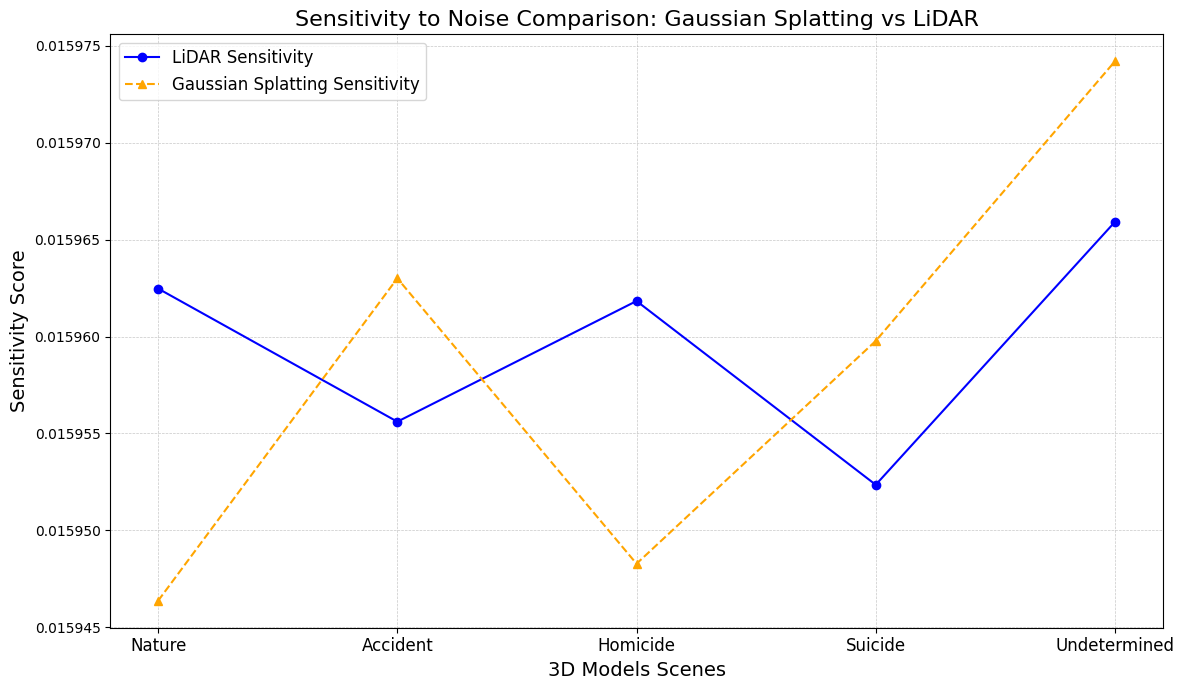

In [19]:


# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Line plot for sensitivity scores
ax.plot(df.index, df['LiDAR'], marker='o', linestyle='-', color='blue', label='LiDAR Sensitivity')
ax.plot(df.index, df['Gaussian Splatting'], marker='^', linestyle='--', color='orange', label='Gaussian Splatting Sensitivity')

# Customize the plot
ax.set_xlabel('3D Models Scenes', fontsize=14)
ax.set_ylabel('Sensitivity Score', fontsize=14)
ax.set_title('Sensitivity to Noise Comparison: Gaussian Splatting vs LiDAR', fontsize=16)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(fontsize=12)
ax.set_xticks(np.arange(len(df.index)))
ax.set_xticklabels(df.index, fontsize=12)

plt.tight_layout()
plt.show()

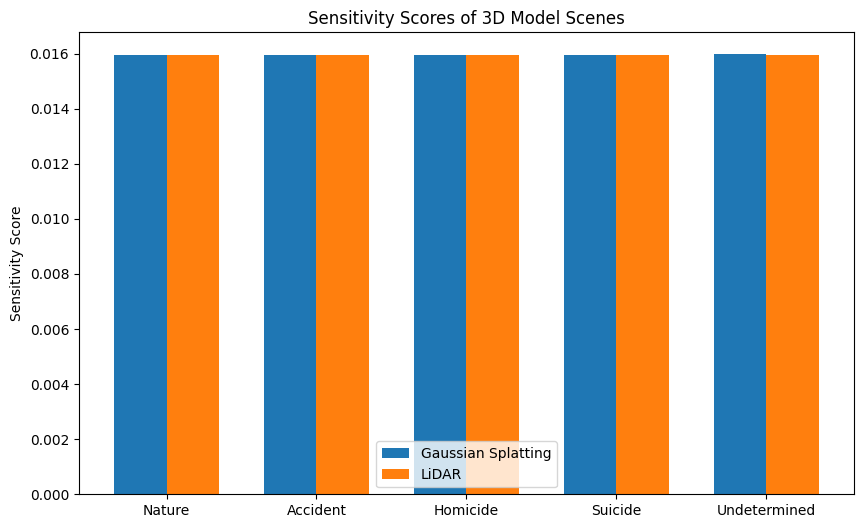

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
scene_types = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']
gaussian_sensitivities = [
    0.01594637493598804,
    0.015963001909961996,
    0.015948283357999214,
    0.015959773873480614,
    0.015974193361524065
]

lidar_sensitivities = [
    0.01596247339734716,
    0.015955609126464227,
    0.01596183113245701,
    0.015952355103301993,
    0.015965913401476035
]

# X-axis positions
x = np.arange(len(scene_types))

# Bar width
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, gaussian_sensitivities, width, label='Gaussian Splatting')
bars2 = ax.bar(x + width/2, lidar_sensitivities, width, label='LiDAR')

# Add labels and title
ax.set_ylabel('Sensitivity Score')
ax.set_title('Sensitivity Scores of 3D Model Scenes')
ax.set_xticks(x)
ax.set_xticklabels(scene_types)
ax.legend()

# Save the figure
plt.savefig('sensitivity_scores.png')

# Show plot
plt.show()

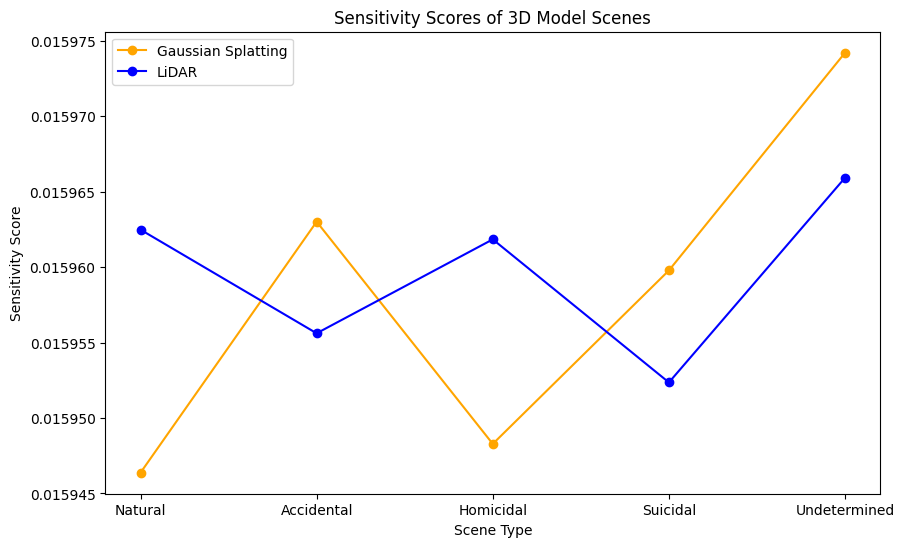

In [3]:
import matplotlib.pyplot as plt

# Data
scene_types = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']
gaussian_sensitivities = [
    0.01594637493598804,
    0.015963001909961996,
    0.015948283357999214,
    0.015959773873480614,
    0.015974193361524065
]

lidar_sensitivities = [
    0.01596247339734716,
    0.015955609126464227,
    0.01596183113245701,
    0.015952355103301993,
    0.015965913401476035
]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Gaussian Splatting Sensitivity
plt.plot(scene_types, gaussian_sensitivities, marker='o', label='Gaussian Splatting', color='orange')

# Plot LiDAR Sensitivity
plt.plot(scene_types, lidar_sensitivities, marker='o', label='LiDAR', color='blue')

# Add labels and title
plt.xlabel('Scene Type')
plt.ylabel('Sensitivity Score')
plt.title('Sensitivity Scores of 3D Model Scenes')
plt.legend()

# Save the figure
plt.savefig('sensitivity_scores_line.png')

# Show plot
plt.show()

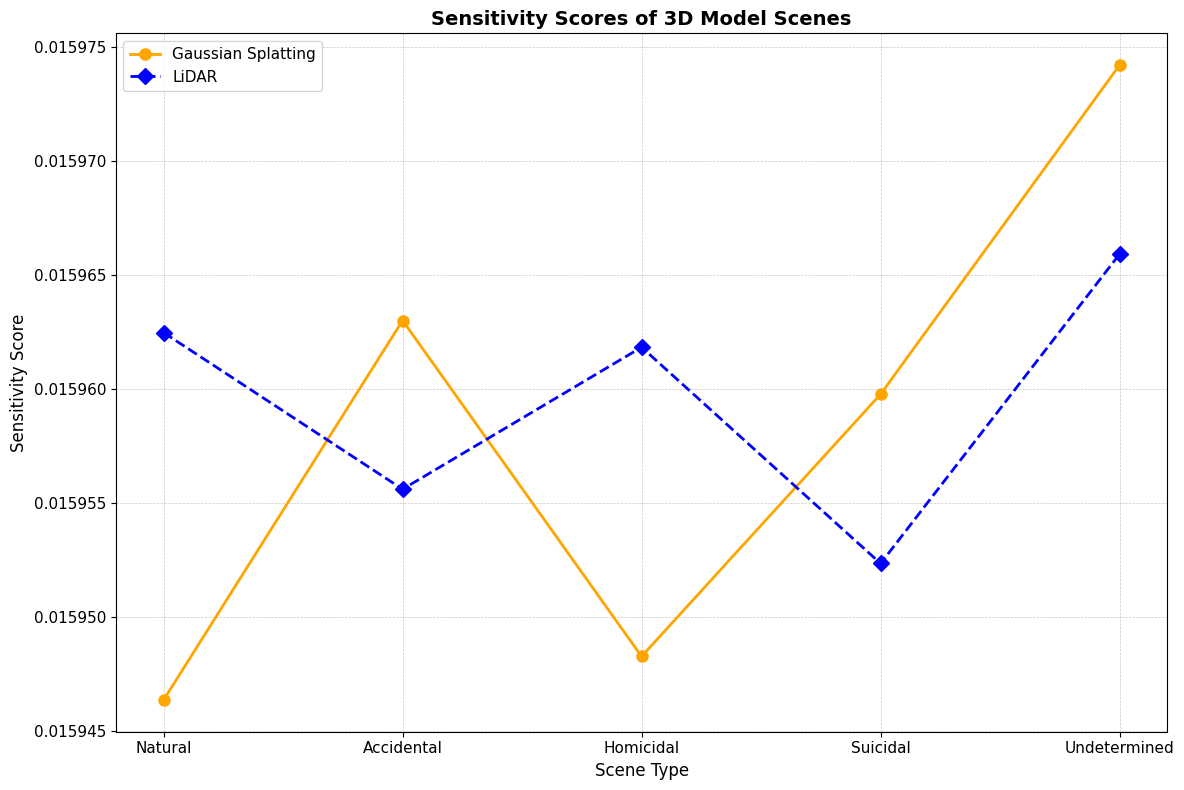

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
scene_types = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']
gaussian_sensitivities = [
    0.01594637493598804,
    0.015963001909961996,
    0.015948283357999214,
    0.015959773873480614,
    0.015974193361524065
]

lidar_sensitivities = [
    0.01596247339734716,
    0.015955609126464227,
    0.01596183113245701,
    0.015952355103301993,
    0.015965913401476035
]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot Gaussian Splatting Sensitivity
plt.plot(scene_types, gaussian_sensitivities, marker='o', linestyle='-', color='orange', linewidth=2, markersize=8, label='Gaussian Splatting')

# Plot LiDAR Sensitivity
plt.plot(scene_types, lidar_sensitivities, marker='D', linestyle='--', color='blue', linewidth=2, markersize=8, label='LiDAR')

# Enhance the plot
plt.xlabel('Scene Type', fontsize=12)
plt.ylabel('Sensitivity Score', fontsize=12)
plt.title('Sensitivity Scores of 3D Model Scenes', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=11)
plt.tight_layout()

# Save the figure
plt.savefig('Images/B4sensitivity_scores_line_professional.png', dpi=300)

# Show plot
plt.show()